<a href="https://colab.research.google.com/github/Idowuilekura/idowu10academy3rdbatch/blob/master/telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
telecom = pd.read_excel('/content/drive/My Drive/data_science_project/Week2_challenge_data_source.xlsx')

In [4]:
telecom.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
telecom.shape

(150001, 55)

In [7]:
# calculating the top handsets used by the customer excluding handsets that is undefined
top_10_used_handset_type=telecom[telecom['Handset Type']!='undefined'].groupby("Handset Type")['Handset Type'].count().nlargest(10)
top_10_used_handset_type

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

In [8]:
# calaculating the percentage of the top ten with respect to the total length of the column
top_10_used_handset_type.sum()/len(telecom[telecom['Handset Type']!='undefined'])*100

50.58008424695421

The result of our analysis shows that most of the users use expensive phones and this accounts for about half of the users. This shows that our users are composed of very rich individuals.

In [9]:
# top 3 handset manufacturers 
top_3_handset_manufacturers = telecom.groupby("Handset Manufacturer")['Handset Manufacturer'].count().nlargest(3)
top_3_handset_manufacturers

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [10]:
top_3_handset_manufacturers.sum()/len(telecom[telecom['Handset Manufacturer']!='undefined'])

0.9561249237664345

The top 3 handset manufacturers are Apple, Samsung and Huawei and they are the most common with a percentage of 95%. This shows that almost all the users uses phones that are made by these 3 companies, recalling some known facts shows that most of the phones made by these manufacturers are expensive

In [11]:
top_3_names = list(top_3_handset_manufacturers.index)
for col in top_3_names:
  print(col) 
  print(telecom.groupby(['Handset Manufacturer','Handset Type'])['Handset Type'].count().loc[col].nlargest(5))
  print("***********************************************************************************************************************")

Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64
***********************************************************************************************************************
Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64
***********************************************************************************************************************
Huawei
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64
********************************************************

From here we could see that the five top phones per manufacturer are quite expensive for example the least Apple phone is around $120 dollars. This shows that most users are wealthy 

univariate analaysis

           Bearer Id
count  106856.000000
mean        1.393792
std         0.806022
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000


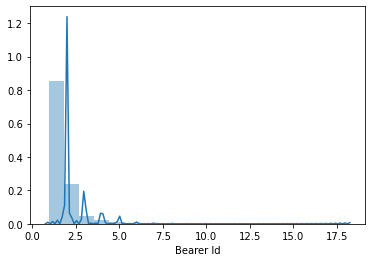

In [111]:
user_per_session_number =telecom.groupby('MSISDN/Number').agg({'Bearer Id':'count'})
print(user_per_session_number.describe())
sns.distplot(user_per_session_number['Bearer Id'],bins=20)

from the above information we could see that the maximum xDr session for each participant is 18 and the minimun is 1. The 75 percentile is 2 and maximum is 18( it shows that most of the users xDr session is from 1 to 2) with few exceptions of users with 18 sessions. This might mean that most users initiated the connection once and after the session ended did not initiate another session

In [13]:
print(list(telecom.columns))

['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (

In [104]:
telecom['total_datavolume_game'] = (telecom['Gaming DL (Bytes)']+telecom['Gaming UL (Bytes)'])*(10**-6)

        Dur. (ms).1
count  1.068560e+05
mean   6.767033e-16
std    8.627729e-16
min    3.306939e-17
25%    3.301312e-16
50%    4.756492e-16
75%    8.000000e-16
max    8.589705e-14


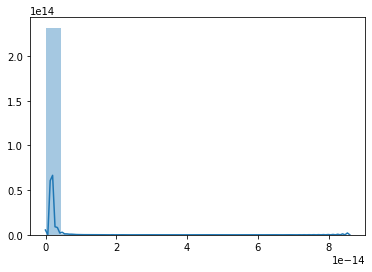

In [113]:
telecom['Dur. (ms).1'] = ((telecom['Dur. (ms).1'])*(10**-6))
user_per_dur=telecom.groupby("MSISDN/Number").agg({'Dur. (ms).1':'sum'})
user_per_dur
max_user_per_dur = user_per_dur.nlargest(1,'Dur. (ms).1')
#print(max_user_per_dur)
min_user_per_dur = user_per_dur.nsmallest(1,'Dur. (ms).1')
# converting from ms to minutes with describe
print(user_per_dur.describe())
sns.distplot(user_per_dur,bins=20)

From the above we could see that the minimum session is about 0.12 minutes, the average is about 2,43 minutes, the 75th percentile is around 2.88 minutes) and the maximum is around 309 minutes( seems to be an outlier, we will deal with it in the next sesison. This shows that the users spends less hours while browsing, this seems to be a bad indication to invest in it, though we will explore it further

In [16]:
print(telecom.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [93]:
telecom['Total_socialmedia_bytes'] = (telecom['Social Media DL (Bytes)'] + telecom['Social Media UL (Bytes)'])*(10**-6)

       Total_gaming_bytes
count       106856.000000
mean           599.769011
std            449.150462
min              0.306358
25%            288.063112
50%            542.349207
75%            777.304138
max           7749.432234


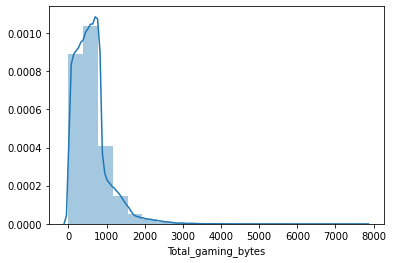

In [137]:
telecom['Total_gaming_bytes'] = (telecom['Gaming DL (Bytes)']+telecom['Gaming UL (Bytes)'])*(1*10**-6)
telecom_gaming=telecom.pivot_table(index='MSISDN/Number',values='Total_gaming_bytes',aggfunc=sum)
round(telecom.pivot_table(index='MSISDN/Number',values='Total_gaming_bytes',aggfunc=sum).describe()*(1*10**-6),3)
fig,ax = plt.subplots()
print(telecom_gaming.describe())
sns.distplot(telecom_gaming['Total_gaming_bytes'],bins=20,ax=ax)
plt.savefig('netflix_uni.png')

       Total_netflix_bytes
count           106856.000
mean                31.538
std                 21.290
min                  0.185
25%                 18.556
50%                 26.719
75%                 37.977
max                399.519


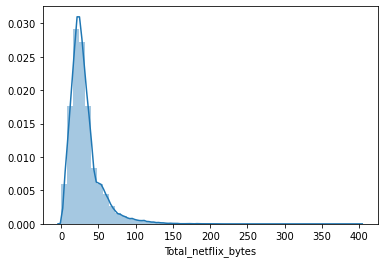

In [118]:
telecom['Total_netflix_bytes'] = (telecom['Netflix DL (Bytes)']+telecom['Netflix UL (Bytes)'])*(1*10**-6)
print(round(telecom.pivot_table(index='MSISDN/Number',values='Total_netflix_bytes',aggfunc=sum).describe(),3))
telecom_netflix=telecom.pivot_table(index='MSISDN/Number',values='Total_netflix_bytes',aggfunc=sum)
fig,ax = plt.subplots()
sample_10 = telecom_netflix.sample(100,random_state=1)
sns.distplot(telecom_netflix['Total_netflix_bytes'],ax=ax)

       Total_youtube_bytes
count           106856.000
mean                31.558
std                 21.295
min                  0.079
25%                 18.631
50%                 26.800
75%                 37.928
max                452.959


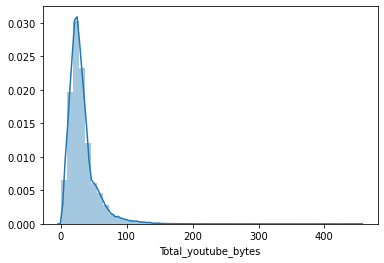

In [117]:
telecom['Total_youtube_bytes'] = (telecom['Youtube DL (Bytes)']+telecom['Youtube UL (Bytes)'])*(10**-6)
user_by_youtube = telecom.groupby("MSISDN/Number").agg({'Total_youtube_bytes':'sum'})
print(round(user_by_youtube.describe(),3))
sample_10 = user_by_youtube.sample(100,random_state=1)
fig,ax = plt.subplots()
sns.distplot(user_by_youtube['Total_youtube_bytes'],ax=ax)
#ax.set_xscale('log')

       Total_email_bytes
count         106856.000
mean               3.149
std                2.222
min                0.018
25%                1.674
50%                2.800
75%                3.847
max               42.419


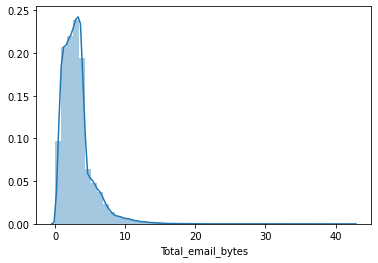

In [138]:
telecom['Total_email_bytes'] = (telecom['Email DL (Bytes)']+telecom['Email UL (Bytes)'])*(10**-6)
user_by_email = telecom.groupby('MSISDN/Number').agg({'Total_email_bytes':'sum'})
print(round(user_by_email.describe(),3))
fig,ax= plt.subplots()
sns.distplot(user_by_email['Total_email_bytes'],ax=ax)
#ax.set_xscale('log')


       Total_google_bytes
count          106856.000
mean               10.882
std                 7.545
min                 0.040
25%                 5.943
50%                 9.586
75%                13.215
max               152.192


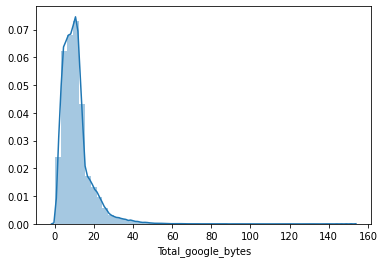

In [120]:
telecom['Total_google_bytes'] = (telecom['Google UL (Bytes)'] + telecom['Google DL (Bytes)'])*(10**-6)
user_by_google=telecom.groupby('MSISDN/Number').agg({'Total_google_bytes':'sum'})
print(round(user_by_google.describe(),3)) #to convert to mb
sns.distplot(user_by_google['Total_google_bytes'])

       Total_socialmedia_bytes
count               106856.000
mean                     2.548
std                      1.908
min                      0.002
25%                      1.211
50%                      2.304
75%                      3.308
max                     43.375


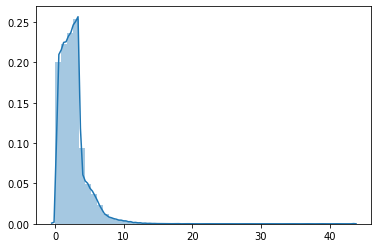

In [121]:
user_by_social_media=telecom.groupby('MSISDN/Number').agg({'Total_socialmedia_bytes':'sum'})
print(round(user_by_social_media.describe(),3))
#sample_100 = user_by_social_media.sample(100,random_state=1)
fig,ax = plt.subplots()
sns.distplot(user_by_social_media,ax=ax)
#ax.set_xscale('log')

From the above table we could see that the minimum total bytes for social media is 0.002 mb, the average is around 2.5 mb, the 75 percentile is around 3.308 while the max is around 43.375mb, with a small standard deviation of about about 1.9 mb, this shows that most of the users total bytes is around 1 to 3,this might mean that the network coverage is bad or most users use phones that are not 4g enabled

In [94]:
telecom['Total_volume_bytes'] = (telecom['Total DL (Bytes)'] + telecom['Total UL (Bytes)'])*(10**-6)

       Total_volume_bytes
count          106856.000
mean              690.962
std               491.056
min                33.249
25%               358.550
50%               617.923
75%               857.435
max              8846.226


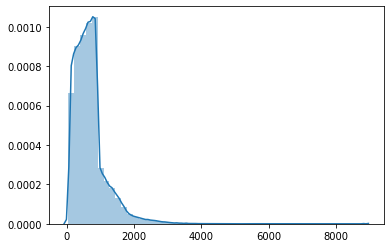

In [122]:
user_by_total_volume=telecom.groupby('MSISDN/Number').agg({'Total_volume_bytes':'sum'})
print(round(user_by_total_volume.describe(),3))
fig,ax = plt.subplots()
sns.distplot(user_by_total_volume)

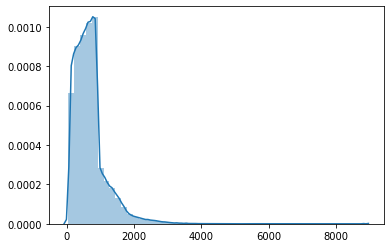

In [97]:
sns.distplot(user_by_total_volume)

In [123]:
df = pd.concat([telecom_gaming,telecom_netflix,user_by_youtube,user_by_email,user_by_google,user_by_social_media,user_by_total_volume],axis=1)

In [129]:
df.columns

Index(['Total_gaming_bytes', 'Total_netflix_bytes', 'Total_youtube_bytes',
       'Total_email_bytes', 'Total_google_bytes', 'Total_socialmedia_bytes',
       'Total_volume_bytes'],
      dtype='object')

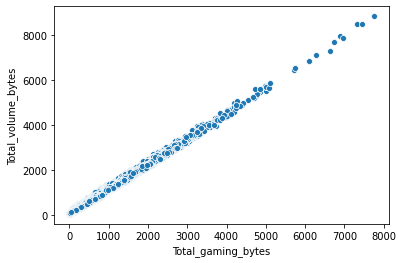

In [128]:
sns.scatterplot(x='Total_gaming_bytes',y='Total_volume_bytes',data=df)

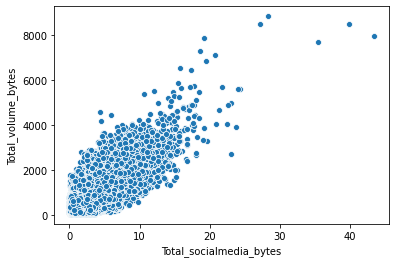

In [136]:
sns.scatterplot(x='Total_socialmedia_bytes',y='Total_volume_bytes',data=df)

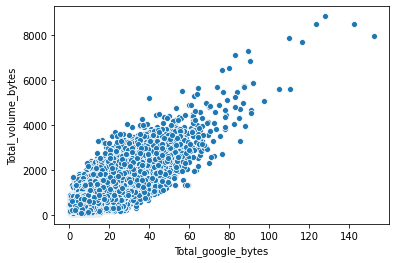

In [135]:
sns.scatterplot(x='Total_google_bytes',y='Total_volume_bytes',data=df)

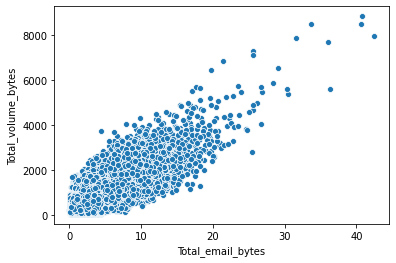

In [133]:
sns.scatterplot(x='Total_email_bytes',y='Total_volume_bytes',data=df)

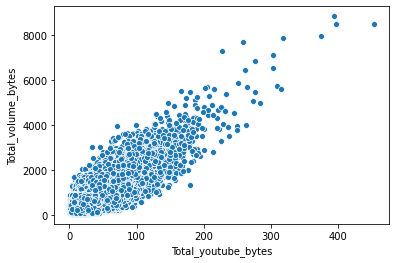

In [132]:
sns.scatterplot(x='Total_youtube_bytes',y='Total_volume_bytes',data=df)

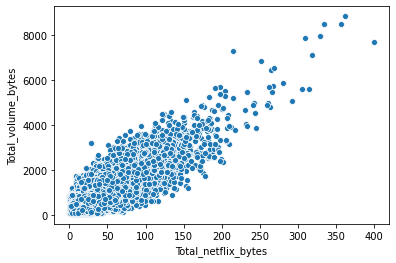

In [131]:
sns.scatterplot(x='Total_netflix_bytes',y='Total_volume_bytes',data=df)